In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Let us read in the data we are going to work with

In [4]:
%%time
fires_df = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\Fires_pandas_df.csv')

Wall time: 3.19 s


Remember that this data is mostly clean and is almost ready to make analysis. We will take a look at its content.

In [5]:
fires_df.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,Discovery_Year,Discovery_Month,Discovery_Day
0,FED,FS-FIRESTAT,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,5.0,USFS,CA,2005,2,2
1,FED,FS-FIRESTAT,1.0,Lightning,0.25,A,38.933056,-120.404444,5.0,USFS,CA,2004,5,12
2,FED,FS-FIRESTAT,5.0,Debris Burning,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,2004,5,31
3,FED,FS-FIRESTAT,1.0,Lightning,0.10,A,38.559167,-119.913333,5.0,USFS,CA,2004,6,28
4,FED,FS-FIRESTAT,1.0,Lightning,0.10,A,38.559167,-119.933056,5.0,USFS,CA,2004,6,28


Let us see the information contained in our dataset

In [6]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   SOURCE_SYSTEM_TYPE  object 
 1   SOURCE_SYSTEM       object 
 2   STAT_CAUSE_CODE     float64
 3   STAT_CAUSE_DESCR    object 
 4   FIRE_SIZE           float64
 5   FIRE_SIZE_CLASS     object 
 6   LATITUDE            float64
 7   LONGITUDE           float64
 8   OWNER_CODE          float64
 9   OWNER_DESCR         object 
 10  STATE               object 
 11  Discovery_Year      int64  
 12  Discovery_Month     int64  
 13  Discovery_Day       int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 192.3+ MB


Our dataset is a combination of numeric and non-numeric data. We will need to convert the non-numeric data that we will use to run our models. This will be done later. Recall that we are working with 1.8M datapoints. Indeed:

In [7]:
fires_df.count()

SOURCE_SYSTEM_TYPE    1800000
SOURCE_SYSTEM         1800000
STAT_CAUSE_CODE       1800000
STAT_CAUSE_DESCR      1800000
FIRE_SIZE             1800000
FIRE_SIZE_CLASS       1800000
LATITUDE              1800000
LONGITUDE             1800000
OWNER_CODE            1800000
OWNER_DESCR           1800000
STATE                 1800000
Discovery_Year        1800000
Discovery_Month       1800000
Discovery_Day         1800000
dtype: int64

It is always good to check for duplicates.

In [8]:
fires_df.duplicated().astype(int).sum()

6125

The dictionary below contains a glosary from the original data source

We have about $0.03\%$ duplicated rows. We will eliminated them. 

In [9]:
fires_df.drop_duplicates(keep=False,inplace=True)

We search for duplicates again

In [10]:
fires_df.duplicated().astype(int).sum()

0

In [11]:
fires_df.count()

SOURCE_SYSTEM_TYPE    1789378
SOURCE_SYSTEM         1789378
STAT_CAUSE_CODE       1789378
STAT_CAUSE_DESCR      1789378
FIRE_SIZE             1789378
FIRE_SIZE_CLASS       1789378
LATITUDE              1789378
LONGITUDE             1789378
OWNER_CODE            1789378
OWNER_DESCR           1789378
STATE                 1789378
Discovery_Year        1789378
Discovery_Month       1789378
Discovery_Day         1789378
dtype: int64

To go to the next step of our analysis, we are going to store the glossary of terms in a dictionary

In [12]:
# Below we create a dictionary that contains the abbreviations given above. The intention of this dictionary is to have those abbreviations at hand.

abb = {}

abb['Fires'] = 'Table including wildfire data for the period of 1992-2015 compiled from US federal, state, and local reporting systems'



abb['FOD_ID'] = 'Global unique identifier'


abb['FPA_ID'] = 'Unique identifier that contains information necessary to track back to the original record in the source dataset'

abb['SOURCE_SYSTEM_TYPE'] = 'Type of source database or system that the record was drawn from (federal, nonfederal, or interagency)'

abb['SOURCE_SYSTEM'] = 'Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or \Supplements\FPAFODsourcelist.pdf, for a list of sources and their identifier'

abb['NWCG_REPORTING_AGENCY'] = 'Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization)'

abb['NWCG_REPORTING_UNIT_ID'] = 'Active NWCG Unit Identifier for the unit preparing the fire report'

abb['NWCG_REPORTING_UNIT_NAME'] = 'Active NWCG Unit Name for the unit preparing the fire report'

abb['SOURCE_REPORTING_UNIT'] = 'Code for the agency unit preparing the fire report, based on code/name in the source dataset'

abb['SOURCE_REPORTING_UNIT_NAME'] = 'Name of reporting agency unit preparing the fire report, based on code/name in the source dataset'

abb['LOCALFIREREPORT_ID'] = 'Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year'

abb['LOCALINCIDENTID'] = 'Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year'

abb['FIRE_CODE'] ='Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/)'

abb['FIRE_NAME'] = 'Name of the incident, from the fire report (primary) or ICS-209 report (secondary)'

abb['ICS209INCIDENT_NUMBER'] = 'Incident (event) identifier, from the ICS-209 report'

abb['ICS209NAME'] = 'Name of the incident, from the ICS-209 report'

abb['MTBS_ID'] = 'Incident identifier, from the MTBS perimeter dataset'

abb['MTBSFIRENAME'] = 'Name of the incident, from the MTBS perimeter dataset'

abb['COMPLEX_NAME'] = 'Name of the complex under which the fire was ultimately managed, when discernible'

abb['FIRE_YEAR'] = 'Calendar year in which the fire was discovered or confirmed to exist'

abb['DISCOVERY_DATE'] ='Date on which the fire was discovered or confirmed to exist'

abb['DISCOVERY_DOY'] = 'Day of year on which the fire was discovered or confirmed to exist'

abb['DISCOVERY_TIME'] = 'Time of day that the fire was discovered or confirmed to exist'

abb['STAT_CAUSE_CODE'] = 'Code for the (statistical) cause of the fire'

abb['STAT_CAUSE_DESCR'] = 'Description of the (statistical) cause of the fire'

abb['CONT_DATE'] = 'Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year)'

abb['CONT_DOY'] = 'Day of year on which the fire was declared contained or otherwise controlled'

abb['CONT_TIME'] = 'Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes)'

abb['FIRE_SIZE'] = 'Estimate of acres within the final perimeter of the fire'

abb['FIRE_SIZE_CLASS'] = 'Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)'

abb['LATITUDE'] = 'Latitude (NAD83) for point location of the fire (decimal degrees)'

abb['LONGITUDE'] = 'Longitude (NAD83) for point location of the fire (decimal degrees)'

abb['OWNER_CODE'] = 'Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident'

abb['OWNER_DESCR'] = 'Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident'

abb['STATE'] = 'Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report'

abb['COUNTY'] = 'County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report'

abb['FIPS_CODE'] = 'Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities'

abb['FIPS_NAME'] = 'County name from the FIPS publication 6-4 for representation of counties and equivalent entities'

abb['NWCGUnitIDActive20170109'] = 'Look-up table containing all NWCG identifiers for agency units that were active (i.e., valid) as of 9 January 2017, when the list was downloaded from https://www.nifc.blm.gov/unit_id/Publish.html and used as the source of values available to populate the following fields in the Fires table: NWCGREPORTINGAGENCY, NWCGREPORTINGUNITID, and NWCGREPORTINGUNITNAME'

abb['UnitId'] = 'NWCG Unit ID'

abb['GeographicArea'] = 'Two-letter code for the geographic area in which the unit is located (NA=National, IN=International, AK=Alaska, CA=California, EA=Eastern Area, GB=Great Basin, NR=Northern Rockies, NW=Northwest, RM=Rocky Mountain, SA=Southern Area, and SW=Southwest)'

abb['Gacc']= 'Seven or eight-letter code for the Geographic Area Coordination Center in which the unit is located or primarily affiliated with (CAMBCIFC=Canadian Interagency Forest Fire Centre, USAKCC=Alaska Interagency Coordination Center, USCAONCC=Northern California Area Coordination Center, USCAOSCC=Southern California Coordination Center, USCORMCC=Rocky Mountain Area Coordination Center, USGASAC=Southern Area Coordination Center, USIDNIC=National Interagency Coordination Center, USMTNRC=Northern Rockies Coordination Center, USNMSWC=Southwest Area Coordination Center, USORNWC=Northwest Area Coordination Center, USUTGBC=Western Great Basin Coordination Center, USWIEACC=Eastern Area Coordination Center)'

abb['WildlandRole'] = 'Role of the unit within the wildland fire community'

abb['UnitType'] = 'Type of unit (e.g., federal, state, local)'

abb['Department'] = 'Department (or state/territory) to which the unit belongs (AK=Alaska, AL=Alabama, AR=Arkansas, AZ=Arizona, CA=California, CO=Colorado, CT=Connecticut, DE=Delaware, DHS=Department of Homeland Security, DOC= Department of Commerce, DOD=Department of Defense, DOE=Department of Energy, DOI= Department of Interior, DOL=Department of Labor, FL=Florida, GA=Georgia, IA=Iowa, IA/GC=Non-Departmental Agencies, ID=Idaho, IL=Illinois, IN=Indiana, KS=Kansas, KY=Kentucky, LA=Louisiana, MA=Massachusetts, MD=Maryland, ME=Maine, MI=Michigan, MN=Minnesota, MO=Missouri, MS=Mississippi, MT=Montana, NC=North Carolina, NE=Nebraska, NG=Non-Government, NH=New Hampshire, NJ=New Jersey, NM=New Mexico, NV=Nevada, NY=New York, OH=Ohio, OK=Oklahoma, OR=Oregon, PA=Pennsylvania, PR=Puerto Rico, RI=Rhode Island, SC=South Carolina, SD=South Dakota, ST/L=State or Local Government, TN=Tennessee, Tribe=Tribe, TX=Texas, USDA=Department of Agriculture, UT=Utah, VA=Virginia, VI=U. S. Virgin Islands, VT=Vermont, WA=Washington, WI=Wisconsin, WV=West Virginia, WY=Wyoming)'

abb['Agency'] = 'Agency or bureau to which the unit belongs (AG=Air Guard, ANC=Alaska Native Corporation, BIA=Bureau of Indian Affairs, BLM=Bureau of Land Management, BOEM=Bureau of Ocean Energy Management, BOR=Bureau of Reclamation, BSEE=Bureau of Safety and Environmental Enforcement, C&L=County & Local, CDF=California Department of Forestry & Fire Protection, DC=Department of Corrections, DFE=Division of Forest Environment, DFF=Division of Forestry Fire & State Lands, DFL=Division of Forests and Land, DFR=Division of Forest Resources, DL=Department of Lands, DNR=Department of Natural Resources, DNRC=Department of Natural Resources and Conservation, DNRF=Department of Natural Resources Forest Service, DOA=Department of Agriculture, DOC=Department of Conservation, DOE=Department of Energy, DOF=Department of Forestry, DVF=Division of Forestry, DWF=Division of Wildland Fire, EPA=Environmental Protection Agency, FC=Forestry Commission, FEMA=Federal Emergency Management Agency, FFC=Bureau of Forest Fire Control, FFP=Forest Fire Protection, FFS=Forest Fire Service, FR=Forest Rangers, FS=Forest Service, FWS=Fish & Wildlife Service, HQ=Headquarters, JC=Job Corps, NBC=National Business Center, NG=National Guard, NNSA=National Nuclear Security Administration, NPS=National Park Service, NWS=National Weather Service, OES=Office of Emergency Services, PRI=Private, SF=State Forestry, SFS=State Forest Service, SP=State Parks, TNC=The Nature Conservancy, USA=United States Army, USACE=United States Army Corps of Engineers, USAF=United States Air Force, USGS=United States Geological Survey, USN=United States Navy)'

abb['Parent'] = 'Agency subgroup to which the unit belongs (A concatenation of State and Unit from this report - https://www.nifc.blm.gov/unit_id/publish/UnitIdReport.rtf)'

abb['Country'] = 'Country in which the unit is located (e.g. US = United States)'

abb['State'] = 'Two-letter code for the state in which the unit is located (or primarily affiliated)'

abb['Code'] = 'Unit code (follows state code to create UnitId)'

abb['Name'] = 'Unit name'

At this point, we can turn our attention to the dependent variable: cause of fires. Let us analyse the two columns containing this information.

In [13]:
#%%time
#sns.pairplot(fires_df)
#plt.show()
# This code takes forever to run!

In [14]:
print('STAT_CAUSE_DESCR different elements:', fires_df['STAT_CAUSE_DESCR'].unique())

print('')
print('')

print('Column decription:', abb['STAT_CAUSE_CODE'])

print('')
print('')

print('STAT_CAUSE_DESCR number of different elements:', len(fires_df['STAT_CAUSE_DESCR'].unique()))


print('')
print('')

print('STAT_CAUSE_CODE:', fires_df['STAT_CAUSE_CODE'].unique())

STAT_CAUSE_DESCR different elements: ['Miscellaneous' 'Lightning' 'Debris Burning' 'Campfire' 'Equipment Use'
 'Arson' 'Children' 'Railroad' 'Smoking' 'Powerline' 'Structure'
 'Fireworks' 'Missing/Undefined']


Column decription: Code for the (statistical) cause of the fire


STAT_CAUSE_DESCR number of different elements: 13


STAT_CAUSE_CODE: [ 9.  1.  5.  4.  2.  7.  8.  6.  3. 11. 12. 10. 13.]


We have $13$ different classes. This number of classes ususally causes imbalancy problems. Therefore, we should take a look at the histogram. We will do this with the sample we have at hand and more importantly, we are going to do it with all the data. Let us create a dictionary that stores the names of the different classes, together with their codes.

In [15]:
fire_causes_codes = \
{
1: 'Lightning',
2:'Equipment Use',
3:'Smoking',
4:'Campfire',
5:'Debris Burning',
6:'Railroad',
7: 'Arson',
8:'Children',
9:'Miscellaneous',
10:'Fireworks',
11: 'Powerline',
12: 'Structure',
13: 'Missing/Undefined'
}


fire_causes_codes

{1: 'Lightning',
 2: 'Equipment Use',
 3: 'Smoking',
 4: 'Campfire',
 5: 'Debris Burning',
 6: 'Railroad',
 7: 'Arson',
 8: 'Children',
 9: 'Miscellaneous',
 10: 'Fireworks',
 11: 'Powerline',
 12: 'Structure',
 13: 'Missing/Undefined'}

Below is the distribution

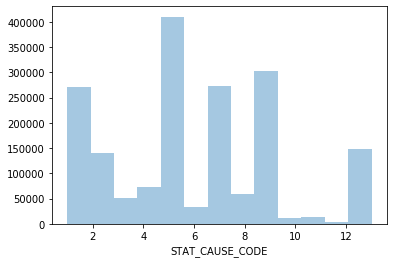

In [16]:
#Let's see the distribution
sns.distplot(fires_df['STAT_CAUSE_CODE'], bins=13, kde=False)

# We see that Miscellaneous is the category with most fires associated.

There is a clear imbalance in our data: 5 categories are above 205K observations, two categories with about 150K observations, 2 categories with about 50K observations, and 5 categories with less than 50K observations. 

Three categories have very few observations: 10, 11, and 12. That is,'Fireworks','Powerline', and 'Structure'. Below we count the number of observations for these 3 categories. We may decide to drop them later. For now we wil continue our analysis.

In [17]:
# making boolean series for a Misc cause 

fires = fires_df
filter_1 = fires["STAT_CAUSE_DESCR"]=='Fireworks'  

x1 = fires.where(filter_1)
x1.dropna(inplace = True)
x1 = x1.shape[0]



fires = fires_df
filter_2 = fires["STAT_CAUSE_DESCR"]=='Powerline'

x2 = fires.where(filter_2)
x2.dropna(inplace = True)
x2 = x2.shape[0]



fires = fires_df
filter_3 = fires["STAT_CAUSE_DESCR"]=='Structure'

x3 = fires.where(filter_3)
x3.dropna(inplace = True)
x3 = x3.shape[0]

print('Fireworks has', x1, 'observations' )
print('')
print('')
print('Powerline has', x2, 'observations' )
print('')
print('')
print('Structure has', x1, 'observations' )
print('')
print('')
print('The three classes above have', x1 + x2 + x3)

Fireworks has 10897 observations


Powerline has 12752 observations


Structure has 10897 observations


The three classes above have 27106


The three classes above represent all together $1.5\%$ of our data. 

Continuing with our analysis, we are going to make categorize our target column. We have two columns containing the target variable information: `STAT_CAUSE_CODE` and `STAT_CAUSE_DESCR`. We will eliminate one of them and categorize the other.

In [18]:
fires_df.drop(['STAT_CAUSE_CODE'], axis = 1, inplace = True)

In [19]:
# we make our column categorical
fires_df["STAT_CAUSE_DESCR"] = fires_df["STAT_CAUSE_DESCR"].astype('category')
fires_df.dtypes

SOURCE_SYSTEM_TYPE      object
SOURCE_SYSTEM           object
STAT_CAUSE_DESCR      category
FIRE_SIZE              float64
FIRE_SIZE_CLASS         object
LATITUDE               float64
LONGITUDE              float64
OWNER_CODE             float64
OWNER_DESCR             object
STATE                   object
Discovery_Year           int64
Discovery_Month          int64
Discovery_Day            int64
dtype: object

We can see the the different categories are ordered to get the codes

In [20]:
# We can see the how the different categories are ordered to get the codes
fires_df["STAT_CAUSE_DESCR"].cat.categories
#fires_df["STAT_CAUSE_DESCR"].cat.ordered

Index(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'],
      dtype='object')

Now we can assign the encoded variable to a new column using the cat.codes accessor:

In [21]:
#Now we can assign the encoded variable to a new column using the cat.codes accessor:

fires_df["STAT_CAUSE_DESCR_cat"] = fires_df["STAT_CAUSE_DESCR"].cat.codes


# we are following the directions given in `https://pbpython.com/categorical-encoding.html`

To be more explicit, a ``STAT_CAUSE_DESCR_cat`` with code 0 will correspond  to 'Arson', code 7 will correspond to 'Miscellaneous', and so on. We can create a dictionary to store this information.

In [22]:
# We can create a dictionary to store this information

s = fires_df["STAT_CAUSE_DESCR"].cat.categories

indp_map = {}

lista = list(range(13))

for i in lista:
    indp_map[s[i]] =i

indp_map

{'Arson': 0,
 'Campfire': 1,
 'Children': 2,
 'Debris Burning': 3,
 'Equipment Use': 4,
 'Fireworks': 5,
 'Lightning': 6,
 'Miscellaneous': 7,
 'Missing/Undefined': 8,
 'Powerline': 9,
 'Railroad': 10,
 'Smoking': 11,
 'Structure': 12}

Below we can see how the data looks like so far.

In [23]:
fires_df.head().T

,0,1,2,3,4
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
STAT_CAUSE_DESCR,Miscellaneous,Lightning,Debris Burning,Lightning,Lightning
FIRE_SIZE,0.1,0.25,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,40.0369,38.9331,38.9842,38.5592,38.5592
LONGITUDE,-121.006,-120.404,-120.736,-119.913,-119.933
OWNER_CODE,5,5,13,5,5
OWNER_DESCR,USFS,USFS,STATE OR PRIVATE,USFS,USFS
STATE,CA,CA,CA,CA,CA


Let's define our independent variable

In [24]:
# Let's define our independent variable:

y = fires_df['STAT_CAUSE_DESCR_cat']

We can make a barplot to see if the data is balanced

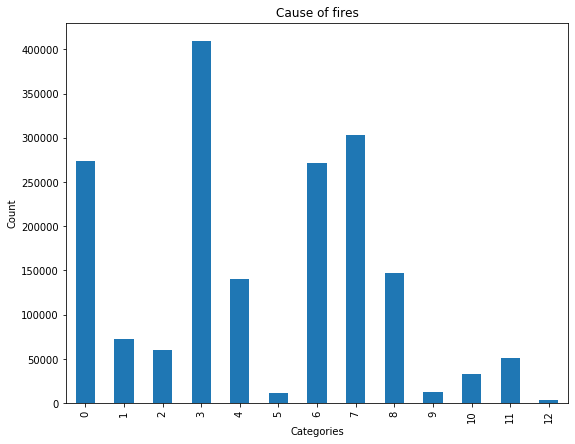

In [25]:
plt.figure(figsize=(9,7))

u = fires_df.groupby(['STAT_CAUSE_DESCR_cat'])['STAT_CAUSE_DESCR']

u.count().plot(kind='bar')

#sns.distplot(u, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(u.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Cause of fires')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

We can see how imbalanced is our data. Category $3$ has at least $30\%$ more observations than any other category.

Now we focus on the independent variables. We still have to take care of non-numeric columns

In [26]:
# Define X

X = fires_df.drop(['STAT_CAUSE_DESCR_cat'], axis = 1)
X.drop(['STAT_CAUSE_DESCR'], axis =1, inplace = True)
X.head().T

,0,1,2,3,4
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
FIRE_SIZE,0.1,0.25,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,40.0369,38.9331,38.9842,38.5592,38.5592
LONGITUDE,-121.006,-120.404,-120.736,-119.913,-119.933
OWNER_CODE,5,5,13,5,5
OWNER_DESCR,USFS,USFS,STATE OR PRIVATE,USFS,USFS
STATE,CA,CA,CA,CA,CA
Discovery_Year,2005,2004,2004,2004,2004


Let's see what non-numerical columns we have

In [27]:
# Let's see what non-numerical columns we have

non_num_col = ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_SIZE_CLASS', 'OWNER_DESCR', 'STATE']
# We have 5 in total

There are two columns that contain similar information: `` OWNER_CODE `` and `` OWNER_DESCR ``  

In [28]:
# The columns below contain similar information


print(abb['OWNER_CODE'])
print(abb['OWNER_DESCR'])
print('')
print('')
print('')

print('Below is the map that assigns each code to the names:')
print('Owner code:', X['OWNER_CODE'].unique())
print('Owner decription:', X['OWNER_DESCR'].unique())

Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident
Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident



Below is the map that assigns each code to the names:
Owner code: [ 5. 13. 14.  6.  2.  4.  9.  8.  7.  1.  3. 10.  0. 12. 11. 15.]
Owner decription: ['USFS' 'STATE OR PRIVATE' 'MISSING/NOT SPECIFIED' 'OTHER FEDERAL' 'BIA'
 'FWS' 'TRIBAL' 'PRIVATE' 'STATE' 'BLM' 'NPS' 'BOR' 'FOREIGN'
 'MUNICIPAL/LOCAL' 'COUNTY' 'UNDEFINED FEDERAL']


We will drop the ``OWNER_CODE`` column and get the dummies later.

In [29]:
# We will drop the OWNER_CODE COLUMN .

X.drop(['OWNER_CODE'], axis =1, inplace = True)

We can see how our independent variables dataframe looks like so far.

In [30]:
X.head().T

,0,1,2,3,4
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
FIRE_SIZE,0.1,0.25,0.1,0.1,0.1
FIRE_SIZE_CLASS,A,A,A,A,A
LATITUDE,40.0369,38.9331,38.9842,38.5592,38.5592
LONGITUDE,-121.006,-120.404,-120.736,-119.913,-119.933
OWNER_DESCR,USFS,USFS,STATE OR PRIVATE,USFS,USFS
STATE,CA,CA,CA,CA,CA
Discovery_Year,2005,2004,2004,2004,2004
Discovery_Month,2,5,5,6,6


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789378 entries, 0 to 1799999
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   SOURCE_SYSTEM_TYPE  object 
 1   SOURCE_SYSTEM       object 
 2   FIRE_SIZE           float64
 3   FIRE_SIZE_CLASS     object 
 4   LATITUDE            float64
 5   LONGITUDE           float64
 6   OWNER_DESCR         object 
 7   STATE               object 
 8   Discovery_Year      int64  
 9   Discovery_Month     int64  
 10  Discovery_Day       int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 163.8+ MB


In [32]:
X.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'Discovery_Year',
       'Discovery_Month', 'Discovery_Day'],
      dtype='object')

If we try to run VIF with



from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


We get a memory error:

---------------------------------------------------------------------------
MemoryError                               Traceback (most recent call last)
<ipython-input-74-54a336798cba> in <module>
      4 
      5 vif = pd.DataFrame()
----> 6 vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      7 vif["features"] = X.columns

<ipython-input-74-54a336798cba> in <listcomp>(.0)
      4 
      5 vif = pd.DataFrame()
----> 6 vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      7 vif["features"] = X.columns

~\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py in variance_inflation_factor(exog, exog_idx)
    190     mask = np.arange(k_vars) != exog_idx
    191     x_noti = exog[:, mask]
--> 192     r_squared_i = OLS(x_i, x_noti).fit().rsquared
    193     vif = 1. / (1. - r_squared_i)
    194     return vif

~\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py in fit(self, method, cov_type, cov_kwds, use_t, **kwargs)
    303                     hasattr(self, 'rank')):
    304 
--> 305                 self.pinv_wexog, singular_values = pinv_extended(self.wexog)
    306                 self.normalized_cov_params = np.dot(
    307                     self.pinv_wexog, np.transpose(self.pinv_wexog))

~\anaconda3\lib\site-packages\statsmodels\tools\tools.py in pinv_extended(X, rcond)
    398             s[i] = 0.
    399     res = np.dot(np.transpose(vt), np.multiply(s[:, np.core.newaxis],
--> 400                                                np.transpose(u)))
    401     return res, s_orig
    402 

MemoryError: Unable to allocate 1.59 GiB for an array with shape (119, 1789378) and data type float64

The code is below

In [33]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split


#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
#vif["features"] = X_vif.columns
#vif.round(1).head(15)

#vif = add_constant(X_vif)
#pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

We are going to convert the non-numerical columns in $X$ to numerical. We will get the dummies.


In [34]:
# Towards getting the dummies:

non_num_col = ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_SIZE_CLASS', 'OWNER_DESCR', 'STATE']

Let's grab the columns we need to get the dummies from

In [35]:
# Let's grab the columns we need to get the dummies from

Z = X.loc[:,non_num_col]
Z

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_SIZE_CLASS,OWNER_DESCR,STATE
0,FED,FS-FIRESTAT,A,USFS,CA
1,FED,FS-FIRESTAT,A,USFS,CA
2,FED,FS-FIRESTAT,A,STATE OR PRIVATE,CA
3,FED,FS-FIRESTAT,A,USFS,CA
4,FED,FS-FIRESTAT,A,USFS,CA
...,...,...,...,...,...
1799995,FED,DOI-WFMI,B,PRIVATE,MT
1799996,FED,DOI-WFMI,E,PRIVATE,MT
1799997,FED,DOI-WFMI,B,BLM,MT
1799998,FED,DOI-WFMI,D,PRIVATE,MT


 Below we obtain the dataframe with the columns of interest for us. Note that the code below also gives the dummies.

In [36]:
# For every column in non_num_col, we will get the dummies

# Below we obtain the df with the columns of interest for us

for col in non_num_col:
    #Getting the dummies:
    z=pd.get_dummies(Z[col])
    #Now we concatenate:
    Z = pd.concat([Z, z], axis=1)
    #Finally, we drop the column where we just got the dummies from. WE do it for both X and Z
    Z.drop([col], axis =1, inplace = True)
    X.drop([col], axis =1, inplace = True)

Let us check that $Z$ looks as explected.

In [37]:
Z.head().T

,0,1,2,3,4
FED,1,1,1,1,1
INTERAGCY,0,0,0,0,0
NONFED,0,0,0,0,0
DOI-WFMI,0,0,0,0,0
FA-NFIRS,0,0,0,0,0
...,...,...,...,...,...
STATE_VT,0,0,0,0,0
STATE_WA,0,0,0,0,0
STATE_WI,0,0,0,0,0
STATE_WV,0,0,0,0,0


Our next step is to concatenate $X$ and $Z$

In [38]:
# Now we concatenate X and Z
X = pd.concat([X, Z], axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789378 entries, 0 to 1799999
Columns: 120 entries, FIRE_SIZE to STATE_WY
dtypes: float64(3), int64(3), uint8(114)
memory usage: 290.1 MB


In [40]:
# Now our independent variables consist only of numeric data. 
X.head().T

,0,1,2,3,4
FIRE_SIZE,0.100000,0.250000,0.100000,0.100000,0.100000
LATITUDE,40.036944,38.933056,38.984167,38.559167,38.559167
LONGITUDE,-121.005833,-120.404444,-120.735556,-119.913333,-119.933056
Discovery_Year,2005.000000,2004.000000,2004.000000,2004.000000,2004.000000
Discovery_Month,2.000000,5.000000,5.000000,6.000000,6.000000
...,...,...,...,...,...
STATE_VT,0.000000,0.000000,0.000000,0.000000,0.000000
STATE_WA,0.000000,0.000000,0.000000,0.000000,0.000000
STATE_WI,0.000000,0.000000,0.000000,0.000000,0.000000
STATE_WV,0.000000,0.000000,0.000000,0.000000,0.000000


We are going to save the dependent and independent variables in a csv file. In this way we can work on the modelling part without having to run the cells above again.

In [41]:
%%time
X.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_X.csv', index = False)

Wall time: 51.5 s


In [42]:
%%time
y.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_y.csv', index = False)

Wall time: 2.22 s


Below we are creating an .cvs file with the latitude and longitude columns in our dataset. 

In [43]:
LL = fires_df[['LONGITUDE','LATITUDE', 'STATE', 'Discovery_Year', 'STAT_CAUSE_DESCR', 'Discovery_Month', 'Discovery_Day', 'FIRE_SIZE', 'FIRE_SIZE_CLASS']]

LL.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_LL.csv', index = False)

In [44]:
fires_df.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'STAT_CAUSE_DESCR', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'Discovery_Year', 'Discovery_Month', 'Discovery_Day',
       'STAT_CAUSE_DESCR_cat'],
      dtype='object')

### Visualizations

Let's get the data frame again to make some visualizations

In [45]:
%%time
fires_df = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\Fires_pandas_df.csv')\

Wall time: 3.57 s


### Fires per year

In [46]:
fires_df.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Discovery_Year',
       'Discovery_Month', 'Discovery_Day'],
      dtype='object')

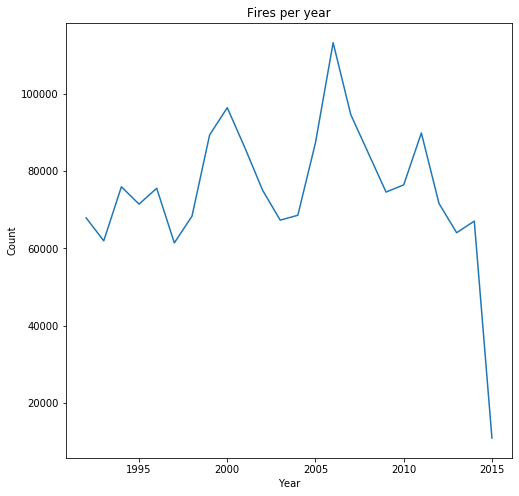

In [47]:
year_count = fires_df.groupby('Discovery_Year').count()

year = year_count.index

count = year_count['STATE']

plt.figure(figsize = (8,8))
plt.plot(year, count)
plt.title('Fires per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Fires per state

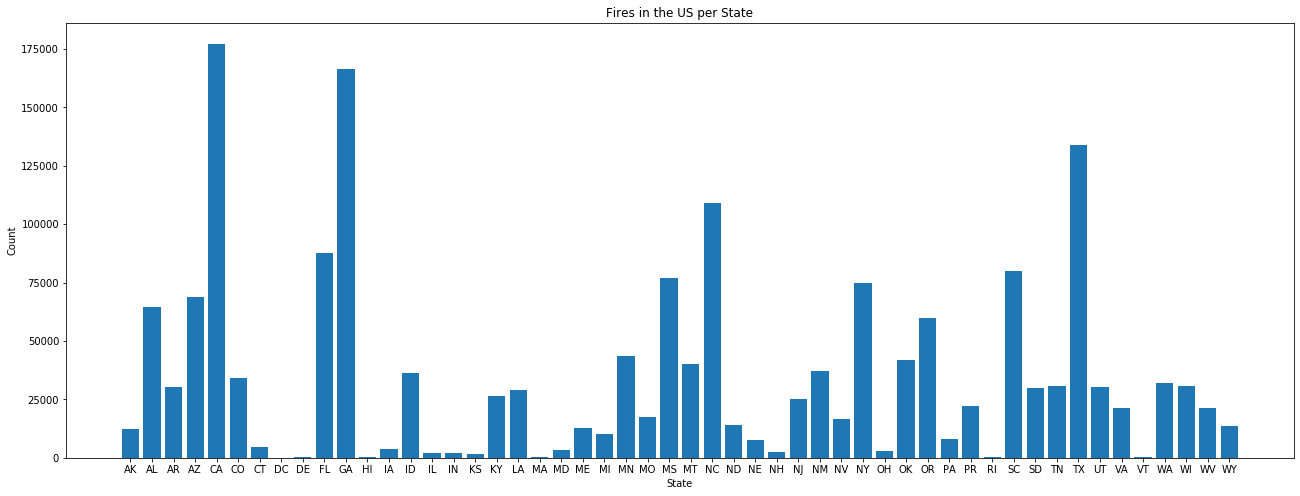

In [48]:
f_count = fires_df.groupby('STATE').count()

u = f_count.index

v = f_count['Discovery_Year']

plt.figure(figsize = (22,8))
plt.bar(u, v)
plt.title('Fires in the US per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [49]:
fires_df.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Discovery_Year',
       'Discovery_Month', 'Discovery_Day'],
      dtype='object')

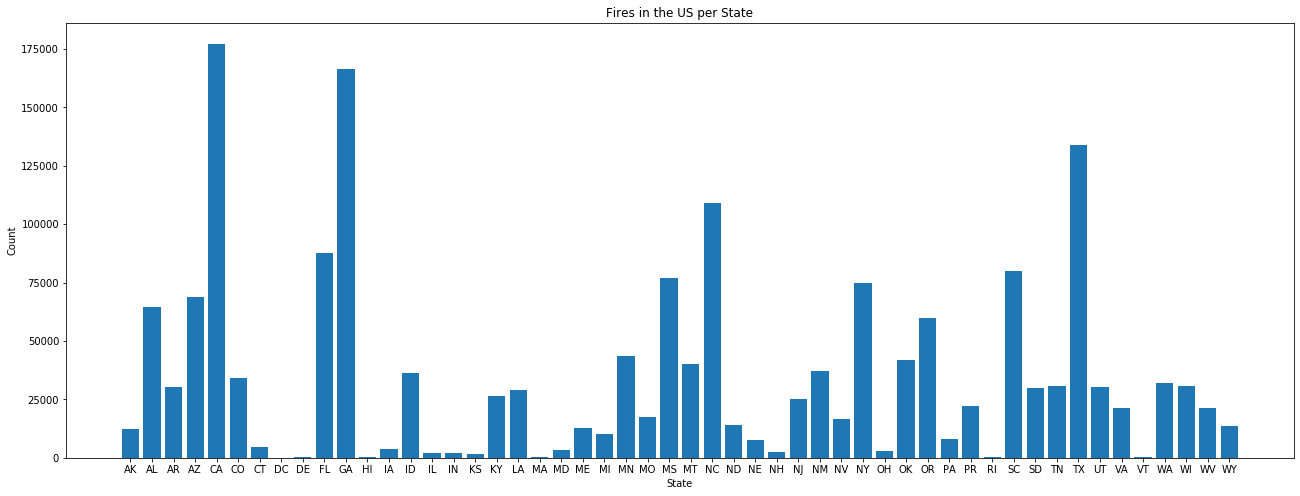

In [50]:
f_count = fires_df.groupby('STATE').count()

u = f_count.index

v = f_count['Discovery_Year']

plt.figure(figsize = (22,8))
plt.bar(u, v)
plt.title('Fires in the US per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Top States

In [51]:
%%time
fires = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\Fires_pandas_df.csv')

Wall time: 3.48 s


In [52]:

filter_1 = fires["STATE"]=='CA'  
#filter_2 = fires["STATE"]=='GA'  
x1 = fires.where(filter_1)
x1.dropna(inplace = True)



filter_2 = fires["STATE"]=='GA'  
x2 = fires.where(filter_2)
x2.dropna(inplace = True)

filter_3 = fires["STATE"]=='NC'  
#filter_2 = fires["STATE"]=='GA'  
x3 = fires.where(filter_3)
x3.dropna(inplace = True)


filter_4 = fires["STATE"]=='TX'  
#filter_2 = fires["STATE"]=='GA'  
x4 = fires.where(filter_4)
x4.dropna(inplace = True)


top4 = pd.concat([x1, x2, x3, x4], ignore_index=True)

In [53]:
top4['STATE'].unique()

array(['CA', 'GA', 'NC', 'TX'], dtype=object)

In [54]:
top4.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'Discovery_Year',
       'Discovery_Month', 'Discovery_Day'],
      dtype='object')

We plot the distribution of below

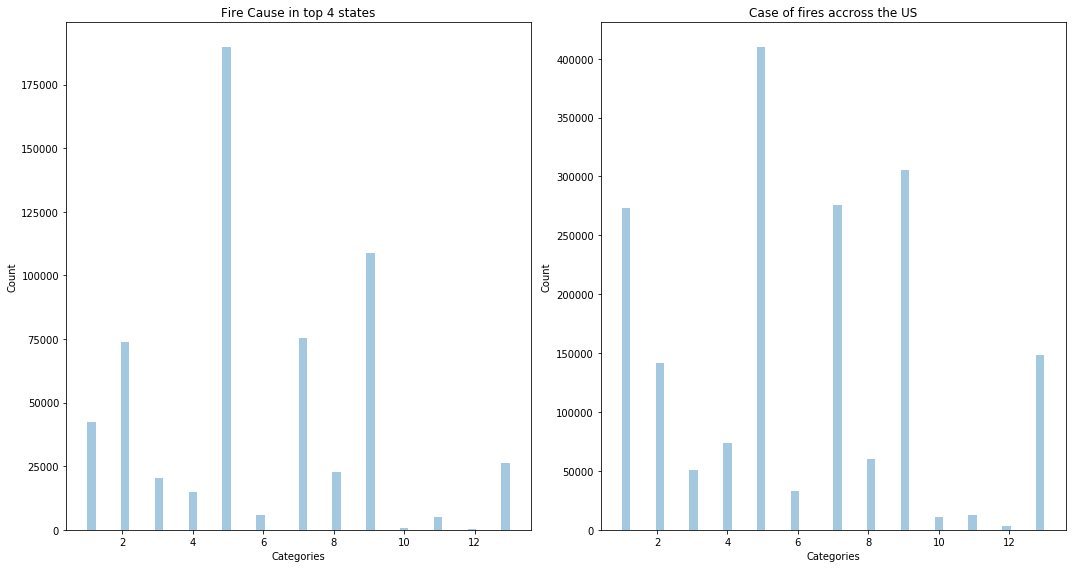

In [55]:
plt.subplots(1, 2, figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(top4['STAT_CAUSE_CODE'], kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Fire Cause in top 4 states')
plt.xlabel('Categories')
plt.ylabel('Count')



plt.subplot(1,2,2)
sns.distplot(fires['STAT_CAUSE_CODE'], kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Case of fires accross the US')
plt.xlabel('Categories')
plt.ylabel('Count')


# This ensures the subplots do not overlap
plt.tight_layout()

# Show the subplots
plt.show()

In [56]:
fires['STAT_CAUSE_DESCR'].unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

Interestingly, both distributinos are quite similar. Below we can obtain the number of fires per year in the top 4 states. 

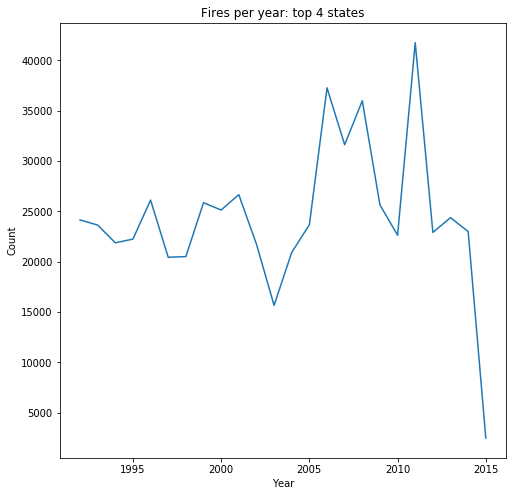

In [57]:
year_count = top4.groupby('Discovery_Year').count()
year = year_count.index




count = year_count['STATE']
plt.figure(figsize = (8,8))
plt.plot(year, count)
plt.title('Fires per year: top 4 states')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We can use a filter to check if we have data on fires in December 2015

In [58]:
filter = fires["Discovery_Year"]==2015  
x2 = fires.where(filter)
x2.dropna(inplace = True)

In [59]:
print('Lastmonth of 2015 where a fire was registered:', x2['Discovery_Month'].max())

print('Last day of December 2015 where a fire was registered:',x2['Discovery_Day'].max())

Lastmonth of 2015 where a fire was registered: 12.0
Last day of December 2015 where a fire was registered: 31.0


A reason for the drastic drop of fires in 2015 could be that we did not read in all the data from the originall source. Let us see the distribution of causes of fires in 2015.

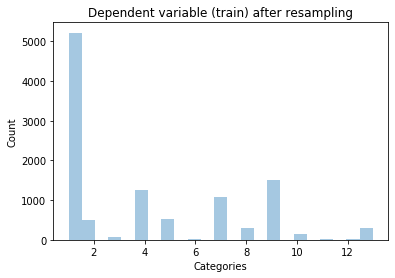

In [60]:
plt.figure()
sns.distplot(x2['STAT_CAUSE_CODE'], kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [61]:
x2['STAT_CAUSE_DESCR'].unique()

array(['Lightning', 'Miscellaneous', 'Campfire', 'Railroad',
       'Equipment Use', 'Debris Burning', 'Arson', 'Children', 'Smoking',
       'Missing/Undefined', 'Powerline', 'Fireworks', 'Structure'],
      dtype=object)

Interestingly, most fires registered in 2015 were caused my a `Miscellaneous` reason. We should also checck the number of fires in 2015.

In [62]:
x2['STAT_CAUSE_DESCR'].count()

10989

This represents $0.6\%$ of the total number of fires registered. We can also see the monthly distribution of fires per state in the year 2015

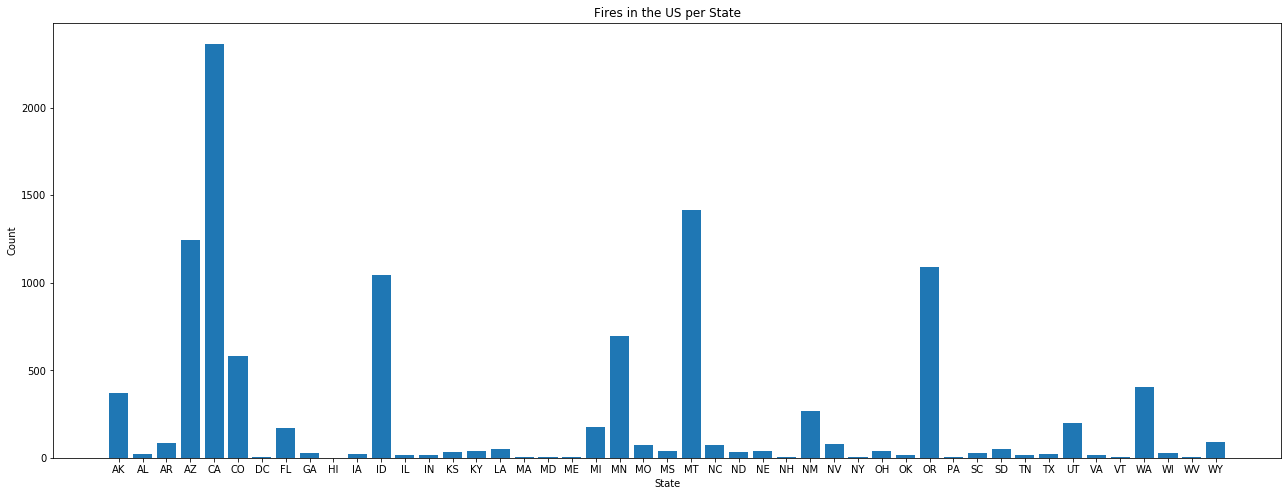

In [63]:
x2_count = x2.groupby('STATE').count()

u = x2_count.index

v = x2_count['Discovery_Month']

plt.figure(figsize = (22,8))
plt.bar(u, v)
plt.title('Fires in the US per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Fire Size

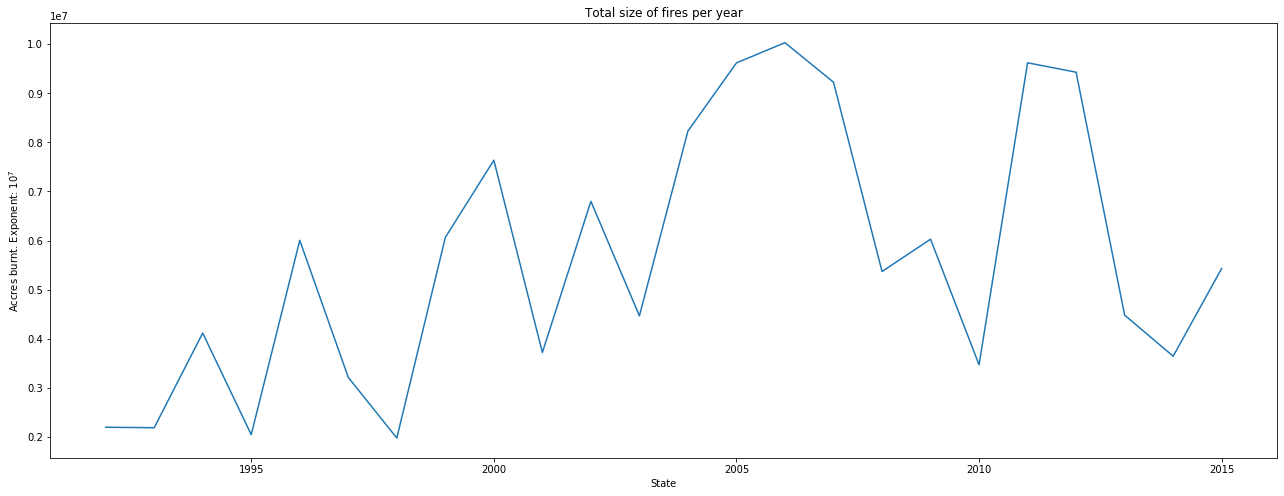

In [159]:
f_count = fires_df.groupby('Discovery_Year')['FIRE_SIZE'].sum()


plt.figure(figsize = (22,8))
plt.plot(f_count)
plt.title('Total size of fires per year')
plt.xlabel('State')
plt.ylabel('Accres burnt. Exponent: $10^7$')
plt.show()


As the graph above shows, there is an overall increasment in the number of accres afected by fires. Below we can see the series that contains this information

In [157]:
f_count

Discovery_Year
1992    2.198618e+06
1993    2.189703e+06
1994    4.116458e+06
1995    2.048510e+06
1996    6.004554e+06
1997    3.214350e+06
1998    1.979409e+06
1999    6.063901e+06
2000    7.636157e+06
2001    3.721279e+06
2002    6.799153e+06
2003    4.468061e+06
2004    8.230584e+06
2005    9.618208e+06
2006    1.002961e+07
2007    9.225163e+06
2008    5.370058e+06
2009    6.027713e+06
2010    3.470649e+06
2011    9.620286e+06
2012    9.428418e+06
2013    4.482467e+06
2014    3.645704e+06
2015    5.432258e+06
Name: FIRE_SIZE, dtype: float64

We can see the size per month

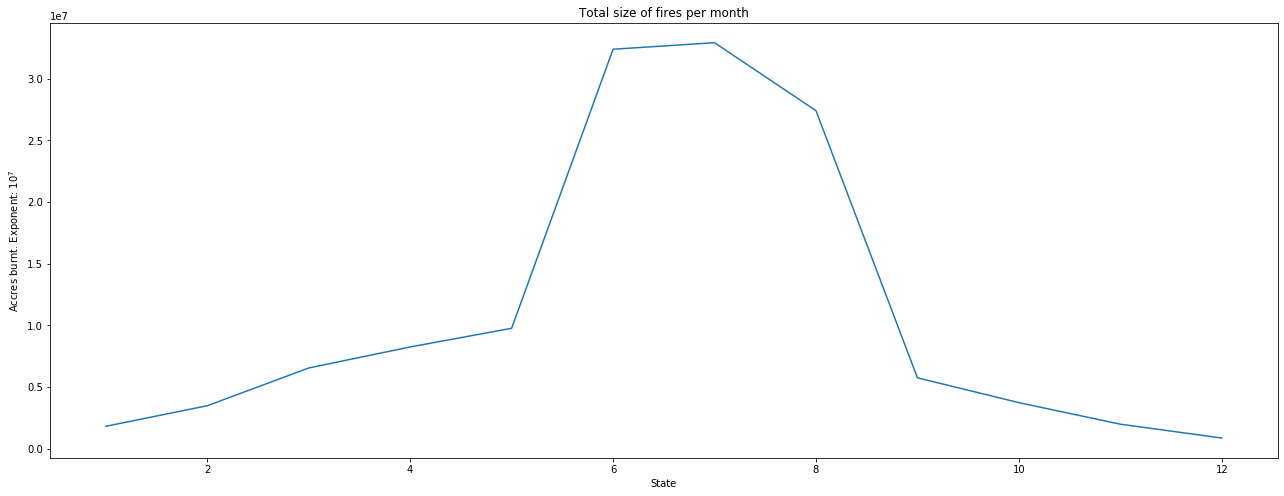

In [161]:
f_count = fires_df.groupby('Discovery_Month')['FIRE_SIZE'].sum()


plt.figure(figsize = (22,8))
plt.plot(f_count)
plt.title('Total size of fires per month')
plt.xlabel('State')
plt.ylabel('Accres burnt. Exponent: $10^7$')
plt.show()

As we expected, most fires are registered in summers. We can also get the day month with most fires.

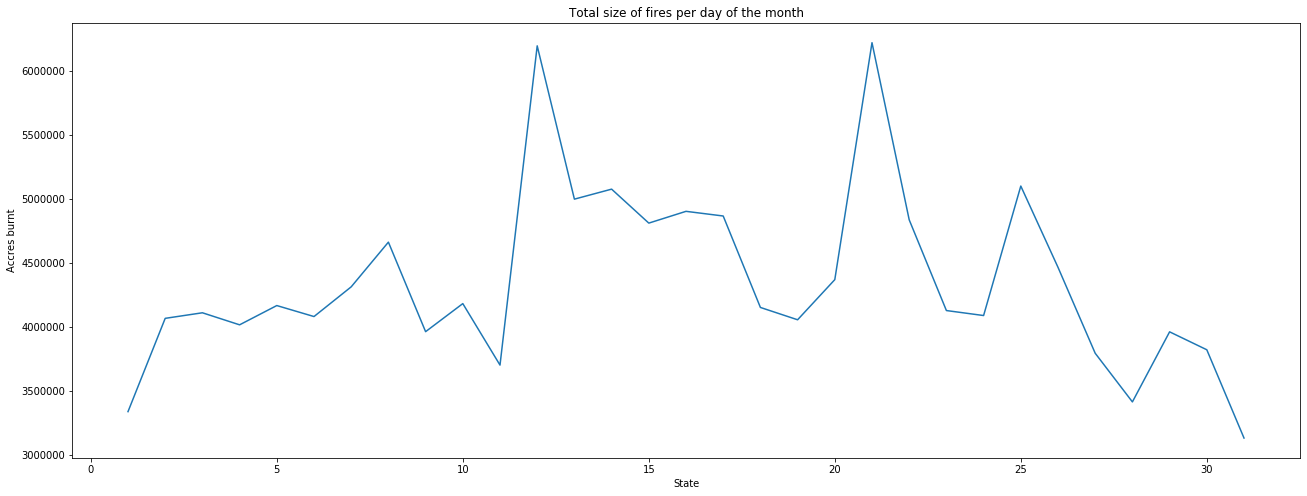

In [165]:
f_count = fires_df.groupby('Discovery_Day')['FIRE_SIZE'].sum()


plt.figure(figsize = (22,8))
plt.plot(f_count)
plt.title('Total size of fires per day of the month')
plt.xlabel('State')
plt.ylabel('Accres burnt')
plt.show()

### Rebalancing the data

There are two obstackles with the data we have prepared for modelling. One is the size of the dataset. $1.8$M datapoints are too many to be processed in a personal machine. This issue can be adddressed by subsampling. The other issue we have is that our data is imbalanced. There are many methods we can try to address this. One could be downsampling or upsampling, or both. We will try both approaches to see wich gives us the best accuracy. As for the models, we will try DecisionTree,  Random Forest and  KNN (if the machine allows us to do so). After we have run each model we will get the corresponding confusion matrix, recall and precision. As for the Decision Trees and Random Forests, I will also calculate the feature's importance.

In [45]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Let us read in the data that we prepared above.

In [46]:
%%time
X = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\fires_X.csv')

Wall time: 3min 14s


In [47]:
%%time
y = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\fires_y.csv')

Wall time: 7.49 s


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789378 entries, 0 to 1789377
Columns: 120 entries, FIRE_SIZE to STATE_WY
dtypes: float64(3), int64(117)
memory usage: 1.6 GB


In [49]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789378 entries, 0 to 1789377
Data columns (total 1 columns):
 #   Column                Dtype
---  ------                -----
 0   STAT_CAUSE_DESCR_cat  int64
dtypes: int64(1)
memory usage: 13.7 MB


Our next steps include:


* Scaling our data so that we can use it with various models
* Downsampling and/or upsampling our data.
* If possible, reduce the number of features using PCA
* Model to run: Decision Tree, KNN and RandomForest.

The last two steps will be in a different notebook. We intent to optimize the hyperparameters and use PCA via Pipelines, using a GridSearch.

In [50]:
# Below we import some of the libraries and packages we may need
#from sklearn.feature_extraction.text import CountVectorizer
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
%matplotlib inline

This dataset is too large to be processed as our models are computational expensive. Therefore, we will work with a subsample of the data.

In [51]:
%time
X_subsample, X_rest, y_subsample, y_rest = \
        train_test_split(X, y, test_size = 0.995, random_state=2020)

Wall time: 0 ns


Let us scale our data and then we split it to get the test set.

In [52]:
%%time

# Splitting the data into the test and remainder data:
X_remainder, X_test, y_remainder, y_test = \
        train_test_split(X_subsample, y_subsample, test_size = 0.3, random_state=2020)


# Scaling:
scaler = StandardScaler()
scaler.fit(X_remainder)
X_remainder = scaler.transform(X_remainder)
X_test = scaler.transform(X_test)

Wall time: 1min 7s


In [53]:
X_remainder.shape

(6262, 120)

In [54]:
y_remainder.shape

(6262, 1)

We will address the imbalance problem in our data using SMOTE. We will do an oversample and an undersampling using `X_remainder` and `y_remainder`.

In [56]:
import imblearn
print(imblearn.__version__)

0.7.0


In [58]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
%%time
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

In [ ]:
plt.figure()
sns.distplot(y_resampled, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

Below we store the data we havee processed so far to have it at hand.

In [ ]:
%%time
# From numpy array to pandas daaframe
X0 = pd.DataFrame(data = X_resampled, index=None, columns=None)
#from pandas df to csv
X0.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_X_smote.csv', index = False)

##
y0 = pd.DataFrame(data = y_resampled, index=None, columns=None)

##

y0.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_y_smote.csv', index = False)




X00 = pd.DataFrame(data = X_test, index=None, columns=None)
#from pandas df to csv
X00.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_X_smote_test.csv', index = False)


y00 = pd.DataFrame(data = y_test, index=None, columns=None)
#from pandas df to csv
y00.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_y_smote_test.csv', index = False)


### The cell below is made to be able to run  the random forest

In [ ]:
X_rf, X_resto, y_rf, y_resto = \
        train_test_split(X_resampled, y_resampled, test_size = 0.9, random_state=2020)


X_rf_test, X_restos, y_rf_test, y_restos = \
        train_test_split(X_test, y_test, test_size = 0.9, random_state=2020)

In [ ]:
plt.figure()
sns.distplot(y_rf, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Random Forest

In [ ]:
%%time
# Import everything again (for completeness)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the pipeline
# Note that this is more of a placeholder, grid search will only look over the values
# in the param grid, this more to setup the pipeline step names

estimators = [('dimensionality', PCA()),
              ('model', RandomForestClassifier())]

pipe = Pipeline(estimators)

param_grid = [
{'dimensionality':[PCA()],
'model': [RandomForestClassifier(n_estimators=100)],
'dimensionality__n_components':np.arange(1,min(X_rf.shape)),
'model__max_features': [3, 4, 5, 6]}
#np.arange(1, 20)
]
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
fittedgrid = grid.fit(X_rf, y_rf)

In [ ]:
# What is the best pipeline?
fittedgrid.best_estimator_

In [ ]:
# Score
fittedgrid.score(X_test, y_test)

In [ ]:
# Accuracy
fittedgrid.score(X_rf, y_rf)

It seems we are overfitting.

In [ ]:
# Let's get the prediction vector
y_pred = fittedgrid.predict(X_test)
y_pred

In [ ]:
%%time
from sklearn.metrics import confusion_matrix

# Let's get the prediction vector
y_pred = fittedgrid.predict(X_test)

y_pred = fittedgrid.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat,
            annot=True,
            fmt="g",
            cbar=False
           )
plt.title('Model Confusion Matrix',size = 25,y=1.01)
plt.show()

In [ ]:
recall = np.diag(conf_mat)/np.sum(conf_mat, axis = 1)
precision = np.diag(conf_mat)/np.sum(conf_mat, axis = 0)

print('Recall:', recall)

print('')

print('Precision:', precision)

print('')

print('Recall mean:', np.mean(recall))

print('')

print('Precision mean:', np.mean(precision))

Below we will determine wich features have the most predictive power.

In [ ]:
#fittedgrid.best_estimator_.feature_importances_()

fittedgrid.best_estimator_[1].feature_importances_

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
#model.fit(X_test, y_test)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Below we do the oversampling. 

In [59]:
# transform the dataset
oversample = SMOTE()
#Fit the data
X_over, y_over = oversample.fit_resample(X_remainder, y_remainder)

In [60]:
X_over.shape

(19903, 120)

In [65]:
y_over.shape

(19903, 1)

In [62]:
%%time
# transform the dataset
oversample = RandomUnderSampler()
#Fit the data
X_under, y_under = oversample.fit_resample(X_remainder, y_remainder)

Wall time: 262 ms


Let us check that everythig looks as excepted.

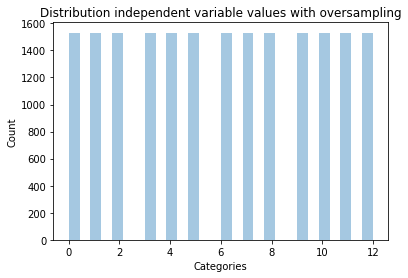

In [63]:
plt.figure()
sns.distplot(y_over, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Distribution independent variable values with oversampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure()
sns.distplot(y_under, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Distribution independent variable values with undersampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

Below I am saving ``X_over`` and ``y_over`` in my machine

In [66]:
%%time
# From numpy array to pandas daaframe
X0 = pd.DataFrame(data = X_over, index=None, columns=None)
#from pandas df to csv
X0.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_X_over.csv', index = False)

##
y0 = pd.DataFrame(data = y_over, index=None, columns=None)

##

y0.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_y_over.csv', index = False)

Wall time: 5.73 s


In [64]:
X00 = pd.DataFrame(data = X_test, index=None, columns=None)
#from pandas df to csv
X00.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_X_over_test.csv', index = False)


y00 = pd.DataFrame(data = y_test, index=None, columns=None)
#from pandas df to csv
y00.to_csv(r'C:\Users\francisco\Desktop\BrainStation\Capstoneproject_BS\FiresUSA\fires_y_over_test.csv', index = False)

Wall time: 25.5 s


In [68]:
%%time
prova_0 = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\fires_X_over.csv')

prova_1 = pd.read_csv('C:\\Users\\francisco\\Desktop\\BrainStation\\Capstoneproject_BS\\FiresUSA\\fires_y_over.csv')

Wall time: 1.08 s


In [70]:
prova_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 18.2 MB


In [71]:
prova_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   STAT_CAUSE_DESCR_cat  19903 non-null  int64
dtypes: int64(1)
memory usage: 155.6 KB


Below we work with all the data

In [ ]:
# transform the dataset
oversample = SMOTE()
#Fit the data
X_overall, y_overall = oversample.fit_resample(X, y)

In [ ]:
plt.figure()
sns.distplot(y_overall, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Distribution independent variable values with oversampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

#### We are ready to start running our models.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS
SCORERS.keys()

### DecissionTre

In [ ]:
%%time
# Import everything again (for completeness)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the pipeline
# Note that this is more of a placeholder, grid search will only look over the values
# in the param grid, this more to setup the pipeline step names

estimators = [('dimensionality', PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [
{'dimensionality':[None],
 'model': [DecisionTreeClassifier()],
 'model__max_depth':np.arange(1, 20)}
]
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
fittedgrid = grid.fit(X_over, y_over)

In [ ]:
# What is the best pipeline?
fittedgrid.best_estimator_

In [ ]:
# Score
fittedgrid.score(X_test, y_test)

In [ ]:
fittedgrid.score(X_remainder, y_remainder)

In [ ]:
%%time
from sklearn.metrics import confusion_matrix

# Let's get the prediction vector
y_pred = fittedgrid.predict(X_test)

y_pred = fittedgrid.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat,
            annot=True,
            fmt="g",
            cbar=False
           )
plt.title('Model Confusion Matrix',size = 25,y=1.01)
plt.show()

In [ ]:
recall = np.diag(conf_mat)/np.sum(conf_mat, axis = 1)
precision = np.diag(conf_mat)/np.sum(conf_mat, axis = 0)

print('Recall:', recall)

print('')

print('Precision:', precision)

print('')

print('Recall mean:', np.mean(recall))

print('')

print('Precision mean:', np.mean(precision))

These scores are acceptable 

In [ ]:
%%time
# Import everything again (for completeness)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the pipeline
# Note that this is more of a placeholder, grid search will only look over the values
# in the param grid, this more to setup the pipeline step names

estimators = [('dimensionality', PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [
{'dimensionality':[None],
 'model': [DecisionTreeClassifier()],
 'model__max_depth':np.arange(1, 80)}
]
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
fittedgrid = grid.fit(X_resampled, y_resampled)

In [ ]:
# What is the best pipeline?
fittedgrid.best_estimator_

In [ ]:
# Score
fittedgrid.score(X_test, y_test)
#0.28

In [ ]:
# Score
fittedgrid.score(X_under, y_under)
#1.0

In [ ]:
y_pred = fittedgrid.predict(X_test)
y_pred

In [ ]:
%%time
from sklearn.metrics import confusion_matrix

y_pred = fittedgrid.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat,
            annot=True,
            fmt="g",
            cbar=False
           )
plt.title('Model Confusion Matrix',size = 25,y=1.01)
plt.show()

### KNN

In [ ]:
%%time
# Import everything again (for completeness)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the pipeline
# Note that this is more of a placeholder, grid search will only look over the values
# in the param grid, this more to setup the pipeline step names



estimators = [('dimensionality', PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [
{ 'dimensionality':[PCA()],
 'model': [KNeighborsClassifier()],
  'dimensionality__n_components':np.arange(1,min(X_resampled.shape)),
  'model__n_neighbors':np.arange(5, 10)}
]
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
fittedgrid = grid.fit(X_under, y_under)

In [ ]:
# What is the best pipeline?
fittedgrid.best_estimator_

In [ ]:
# Score
fittedgrid.score(X_test, y_test)

In [ ]:
fittedgrid.score(X_under, y_under)

In [ ]:
%%time
from sklearn.metrics import confusion_matrix

# Let's get the prediction vector
y_pred = fittedgrid.predict(X_test)

y_pred = fittedgrid.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat,
            annot=True,
            fmt="g",
            cbar=False
           )
plt.title('Model Confusion Matrix',size = 25,y=1.01)
plt.show()

In [ ]:
recall = np.diag(conf_mat)/np.sum(conf_mat, axis = 1)
precision = np.diag(conf_mat)/np.sum(conf_mat, axis = 0)

print('Recall:', recall)

print('')

print('Precision:', precision)

print('')

print('Recall mean:', np.mean(recall))

print('')

print('Precision mean:', np.mean(precision))

In [ ]:
# Let's recall the number of components in our data

print('X_remainder shape', X_remainder.shape)
print('maximum possible number of components to feed our PCA model:', min(X_remainder.shape))

### Below we can see different methods we use to balance the dataset

### Undersampling Cluster Centroids

In [ ]:
%%time
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=2020)
X_r_centroid, y_r_centroid= cc.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_r_centroid).items()))

In [ ]:
plt.figure()
sns.distplot(y_r_centroid, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
%%time
# Import everything again (for completeness)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the pipeline
# Note that this is more of a placeholder, grid search will only look over the values
# in the param grid, this more to setup the pipeline step names



estimators = [('dimensionality', PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [
{ 'dimensionality':[PCA()],
 'model': [KNeighborsClassifier()],
  'dimensionality__n_components':np.arange(1,min(X_resampled.shape)),
  'model__n_neighbors':np.arange(3, 25)}
]
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
fittedgrid = grid.fit(X_r_centroid, y_r_centroid)

In [ ]:
# What is the best pipeline?
fittedgrid.best_estimator_

In [ ]:
# Score
fittedgrid.score(X_test, y_test)

### Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=20)
X_random_u, y_random_u = rus.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_random_u).items()))

In [ ]:
plt.figure()
sns.distplot(y_random_u, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Resampling Tomek:
It gives interesting results

In [ ]:
%%time
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

In [ ]:
%%time
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_remainder, y_remainder)
print(sorted(Counter(y_resampled).items()))

plt.figure()
sns.distplot(y_resampled, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (train) after resampling')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure()
sns.distplot(y_test, kde=False) # Enable `kde` if you also want a curve to be plotted; in this case I've disabled it
#plt.axvline(y.mean(), c='r', label='Mean') # Plot the mean
#plt.axvline(y.median(), c='gold', label='Median') # Plot the median
#plt.legend() # Make a legend so we know which line is the mean and which is the median
plt.title('Dependent variable (test)')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()